<a href="https://colab.research.google.com/github/grimggwp/grimggwp.github.io/blob/main/GBR_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
!pip install NumPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [4]:
import pandas as pd
dataset = pd.read_csv("clear data spheer.csv")
dataset.shape

(90, 4)

In [16]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (81, 4)
Unseen Data For Predictions: (9, 4)


In [17]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'CD', session_id=123) 

,Description,Value
0,session_id,123
1,Target,CD
2,Original Data,"(81, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(56, 3)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='CD',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='mea...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'), ('dummy', Dumm

In [18]:
best = compare_models(exclude = ['ransac'])


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.0019,0.0000,0.0024,0.9809,0.0017,0.0044,0.023
gbr,Gradient Boosting Regressor,0.0018,0.0000,0.0024,0.9807,0.0017,0.0041,0.078
rf,Random Forest Regressor,0.0019,0.0000,0.0027,0.9798,0.0019,0.0046,0.360
et,Extra Trees Regressor,0.0020,0.0000,0.0027,0.9778,0.0019,0.0047,0.309
ada,AdaBoost Regressor,0.0022,0.0000,0.0027,0.9775,0.0019,0.0051,0.146
dt,Decision Tree Regressor,0.0023,0.0000,0.0031,0.9702,0.0022,0.0054,0.025
br,Bayesian Ridge,0.0075,0.0001,0.0091,0.7314,0.0064,0.0174,0.019
ridge,Ridge Regression,0.0073,0.0001,0.0090,0.7311,0.0063,0.0171,0.018
lr,Linear Regression,0.0073,0.0001,0.0090,0.7300,0.0063,0.0171,0.399
lar,Least Angle Regression,0.0073,0.0001,0.0090,0.7300,0.0063,0.0171,0.014


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [19]:
gbr = create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0013,0.0,0.0015,0.9892,0.0010,0.0028
1,0.0014,0.0,0.0019,0.9924,0.0013,0.0032
2,0.0009,0.0,0.0013,0.9863,0.0009,0.0021
3,0.0033,0.0,0.0051,0.9545,0.0036,0.0082
4,0.0009,0.0,0.0010,0.9990,0.0007,0.0021
5,0.0014,0.0,0.0022,0.9895,0.0015,0.0030
6,0.0014,0.0,0.0017,0.9916,0.0012,0.0031
7,0.0015,0.0,0.0020,0.9921,0.0014,0.0034
8,0.0034,0.0,0.0046,0.9707,0.0033,0.0082


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [20]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0026,0.0000,0.0032,0.9474,0.0022,0.0057
1,0.0028,0.0000,0.0036,0.9735,0.0025,0.0062
2,0.0027,0.0000,0.0033,0.9080,0.0023,0.0061
3,0.0070,0.0001,0.0081,0.8858,0.0056,0.0167
4,0.0070,0.0001,0.0084,0.9299,0.0060,0.0171
5,0.0053,0.0000,0.0063,0.9141,0.0043,0.0119
6,0.0045,0.0000,0.0056,0.9140,0.0039,0.0104
7,0.0041,0.0000,0.0047,0.9564,0.0034,0.0100
8,0.0045,0.0000,0.0058,0.9539,0.0041,0.0106


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [23]:
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


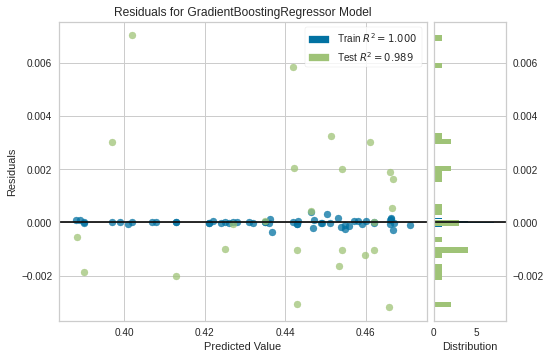

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [22]:
plot_model(gbr)

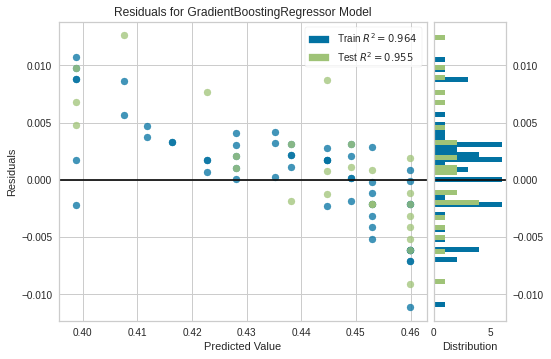

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [24]:
plot_model(tuned_gbr)

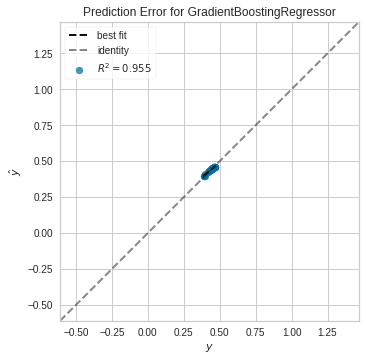

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(tuned_gbr, plot = 'error')


In [26]:
predict_model(tuned_gbr)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing di

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0041,0.0,0.0052,0.9553,0.0037,0.0096


,v(m/s),D(m),RE,CD,Label
0,6.4,0.06,24443.029297,0.448,0.449120
1,1.5,0.70,6683.641113,0.389,0.398773
2,3.8,0.08,19350.732422,0.436,0.444756
3,7.1,0.10,45194.144531,0.469,0.459866
4,3.8,0.04,9548.058594,0.395,0.407623
5,6.0,0.70,26734.564453,0.452,0.452851
6,7.0,0.90,40101.847656,0.464,0.459866
7,2.0,0.90,11457.669922,0.415,0.422709
8,6.0,0.11,42011.457031,0.465,0.459866
9,7.1,0.08,36155.316406,0.458,0.459866


In [27]:
final_gbr = finalize_model(tuned_gbr)


INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, lear

In [28]:
print(final_gbr)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [29]:
predict_model(final_gbr)


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing di

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0028,0.0,0.0036,0.9793,0.0025,0.0066


,v(m/s),D(m),RE,CD,Label
0,6.4,0.06,24443.029297,0.448,0.447876
1,1.5,0.70,6683.641113,0.389,0.396074
2,3.8,0.08,19350.732422,0.436,0.440085
3,7.1,0.10,45194.144531,0.469,0.461042
4,3.8,0.04,9548.058594,0.395,0.400026
5,6.0,0.70,26734.564453,0.452,0.453784
6,7.0,0.90,40101.847656,0.464,0.461042
7,2.0,0.90,11457.669922,0.415,0.415996
8,6.0,0.11,42011.457031,0.465,0.461042
9,7.1,0.08,36155.316406,0.458,0.461042


In [30]:
unseen_predictions = predict_model(final_gbr, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing di

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0042,0.0,0.0053,0.9678,0.0038,0.01


,v(m/s),D(m),RE,CD,Label
0,0.9,0.1,5728.835137,0.385,0.396074
1,3.8,0.1,24188.415020,0.451,0.447876
2,6.4,0.1,40738.383200,0.465,0.461042
3,2.0,0.5,6365.372374,0.388,0.396074
4,5.5,0.5,17504.774030,0.436,0.440085


In [33]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.CD, unseen_predictions.Label, 'R2')

0.9678

In [32]:
save_model(final_gbr,'Final gbr Model 8Feb2023')


INFO:logs:Initializing save_model()
INFO:logs:save_model(model=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=5,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), model_name=Final gbr Model 8Feb2023, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                              

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='CD',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='mea...
                                            learning_rate=0.3, loss='ls',
                                            max_depth=5, max_features=1.0,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0005,
                         

In [34]:
knn = create_model("knn")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0022,0.0,0.0027,0.9619,0.0019,0.0049
1,0.0013,0.0,0.0015,0.9956,0.0010,0.0031
2,0.0013,0.0,0.0015,0.9810,0.0010,0.0030
3,0.0033,0.0,0.0048,0.9599,0.0034,0.0081
4,0.0023,0.0,0.0036,0.9868,0.0026,0.0057
5,0.0019,0.0,0.0024,0.9880,0.0016,0.0042
6,0.0006,0.0,0.0007,0.9984,0.0005,0.0015
7,0.0026,0.0,0.0029,0.9837,0.0020,0.0061
8,0.0018,0.0,0.0020,0.9947,0.0014,0.0041


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [35]:
tuned_knn = tune_model(knn)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0013,0.0,0.0019,0.9815,0.0013,0.0028
1,0.0015,0.0,0.0022,0.9902,0.0015,0.0035
2,0.0004,0.0,0.0006,0.9972,0.0004,0.0009
3,0.0025,0.0,0.0033,0.9809,0.0024,0.0063
4,0.0036,0.0,0.0053,0.9718,0.0038,0.0091
5,0.0014,0.0,0.0022,0.9896,0.0015,0.0029
6,0.0012,0.0,0.0015,0.9935,0.0011,0.0027
7,0.0015,0.0,0.0020,0.9924,0.0014,0.0036
8,0.0015,0.0,0.0019,0.9948,0.0013,0.0033


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                    weights='distance')
INFO:logs:tune_model() succesfully completed......................................


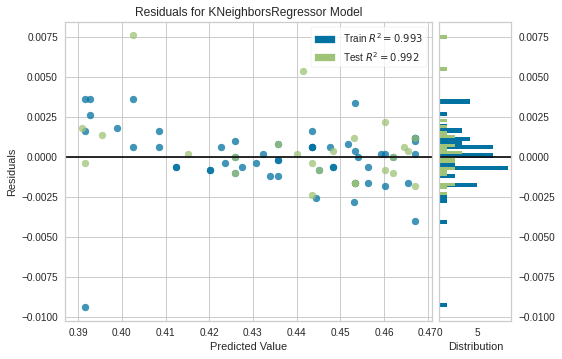

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [36]:
plot_model(knn)

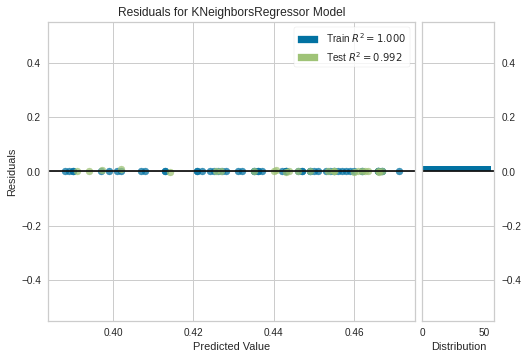

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [37]:
plot_model(tuned_knn)

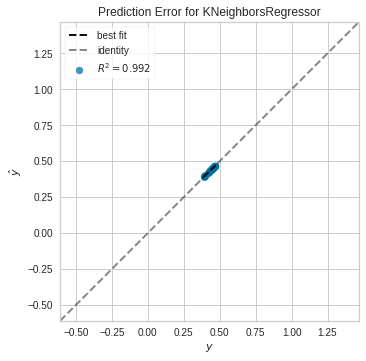

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [38]:
plot_model(tuned_knn, plot="error")

In [39]:
predict_model(tuned_knn)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                    weights='distance'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.0014,0.0,0.0022,0.992,0.0016,0.0034


,v(m/s),D(m),RE,CD,Label
0,6.4,0.06,24443.029297,0.448,0.449017
1,1.5,0.70,6683.641113,0.389,0.391092
2,3.8,0.08,19350.732422,0.436,0.440538
3,7.1,0.10,45194.144531,0.469,0.466089
4,3.8,0.04,9548.058594,0.395,0.402007
5,6.0,0.70,26734.564453,0.452,0.453440
6,7.0,0.90,40101.847656,0.464,0.463492
7,2.0,0.90,11457.669922,0.415,0.414101
8,6.0,0.11,42011.457031,0.465,0.465927
9,7.1,0.08,36155.316406,0.458,0.460839


In [40]:
final_knn = finalize_model(tuned_knn)


INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                    weights='distance'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                    weights='distance')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                    weights='distance'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=Non

In [41]:
print(final_knn)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                    weights='distance')


In [42]:
predict_model(final_knn)


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                    weights='distance'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.0,0.0,0.0,1.0,0.0,0.0


,v(m/s),D(m),RE,CD,Label
0,6.4,0.06,24443.029297,0.448,0.448
1,1.5,0.70,6683.641113,0.389,0.389
2,3.8,0.08,19350.732422,0.436,0.436
3,7.1,0.10,45194.144531,0.469,0.469
4,3.8,0.04,9548.058594,0.395,0.395
5,6.0,0.70,26734.564453,0.452,0.452
6,7.0,0.90,40101.847656,0.464,0.464
7,2.0,0.90,11457.669922,0.415,0.415
8,6.0,0.11,42011.457031,0.465,0.465
9,7.1,0.08,36155.316406,0.458,0.458


In [43]:
unseen_predictions_knn = predict_model(final_knn, data=data_unseen)
unseen_predictions_knn.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                    weights='distance'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.0013,0.0,0.0022,0.9945,0.0016,0.0031


,v(m/s),D(m),RE,CD,Label
0,0.9,0.1,5728.835137,0.385,0.390626
1,3.8,0.1,24188.415020,0.451,0.448484
2,6.4,0.1,40738.383200,0.465,0.464199
3,2.0,0.5,6365.372374,0.388,0.390347
4,5.5,0.5,17504.774030,0.436,0.435988


In [44]:
from pycaret.utils import check_metric
check_metric(unseen_predictions_knn.CD, unseen_predictions_knn.Label, 'R2')

0.9945

In [46]:
save_model(final_knn,'Final knn Model 8Feb2023')


INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                    weights='distance'), model_name=Final knn Model 8Feb2023, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='CD',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='mea...
                ('scaling', 'p

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='CD',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='mea...
                 ('fix_perfect', Remove_100(target='CD')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                 